In [106]:
# V1
import matplotlib.pyplot as plt 
import numpy as np
import re


width = list()
height = list()
label = list()
wh = list()

creature = dict()

# Reads the file line by line, and sorts the data in to three lists
# Enumerate is used to skip the first Header row in the txt file
with open("datapoints.txt", "r") as file:
    
    for n, e in enumerate(file.readlines()):
        if n == 0:
            continue
        line = e.split(", ")
        width.append(round(float(line[0]), 2))
        height.append(round(float(line[1]), 2))
        label.append(int(line[2][:-1]))
        #wh.append( (float(line[0]), float(line[1])) )
    """
    for n, e in enumerate(file.readlines()):
        if n == 0:
            continue
        line = e.split(", ")
        creature[n-1] = { 
            "width":round(float(line[0]), 2),
            "height":round(float(line[1]), 2),
            "label":int(line[2][:-1])
            }
    """

#wh = np.array(wh)
w = np.array(width)
h = np.array(height)
euclidean_distance = np.sqrt(w**2+h**2)

pichu = list()
pikachu = list()
for i in range(len(euclidean_distance)):
    if label[i] :
        pikachu.append(euclidean_distance[i])
    else:
        pichu.append(euclidean_distance[i])
pichu = round( np.average(np.array(pichu)), 2)
pikachu = round( np.average(np.array(pikachu)), 2 )
median = (pichu+pikachu)/2 
print(f"pichu {pichu}")
print(f"pikachu {pikachu}")

def test():
    with open("testpoints.txt", "r") as file:
        return [ "pickachu" if round(np.sqrt(float(re.search(r"\((.*), (.*)\)",e)[1])**2 +float(re.search(r"\((.*), (.*)\)",e)[2])**2), 2) >= median else "pichu"  for i, e in enumerate(file.readlines()) if i != 0] 
        

print("test")
print(test())

print(wh[:10])
print("euclidean_distance")
print(euclidean_distance[:10])
print("w")
print(w[:10])
print("h")
print(h[:10])
print(f"ED: {np.sqrt(w[0]**2+h[0]**2)} ")




print(label[:10])
print(height[:10])
print(width[:10])



def user_input(message:str)->int:
    user_input = input(message) 
    while not user_input.isnumeric() :
        user_input = input(f"Your input is not valid, pleas input a whole positive numeric value\n{message}") 
    return int(user_input)

def evaluator(data):
    return "pickachu" if round(np.sqrt(data[0]**2 + data[1]**2), 2) >= median else "pichu"

#print( f"The pokemon is a { evaluator( (user_input('Input height: '), user_input('Input width:')) ) }" )

# A simple function for determining the color of the data point
def set_color(liz):
    return [ "orange" if e else "yellow" for e in liz ]


#plt.scatter(x, y, color=set_color(p))


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
#ax.set_ylim(-1.1,1.1)
#ax.set_xlim(-1.1,1.1)

ax.set_facecolor((0.1, 0.1, 0.1))
ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8))
ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8))
ax.yaxis.label.set_color((0.8, 0.8, 0.8))
ax.xaxis.label.set_color((0.8, 0.8, 0.8))
ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
ax.spines['left'].set_color((0.8, 0.8, 0.8))
ax.spines['top'].set_color((0.12, 0.12, 0.12))
ax.spines['right'].set_color((0.12, 0.12, 0.12))
fig.set_facecolor((0.12, 0.12, 0.12))

#plt.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))

plt.scatter(height, width, color=set_color(label), marker=".", zorder=2)
plt.ylabel("Height (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
plt.xlabel("Width (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
plt.show()

pichu nan
pikachu nan
test
['pichu', 'pichu', 'pichu', 'pichu']
[]
euclidean_distance
[]
w
[]
h
[]


c:\Code\.venv\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Code\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: index 0 is out of bounds for axis 0 with size 0

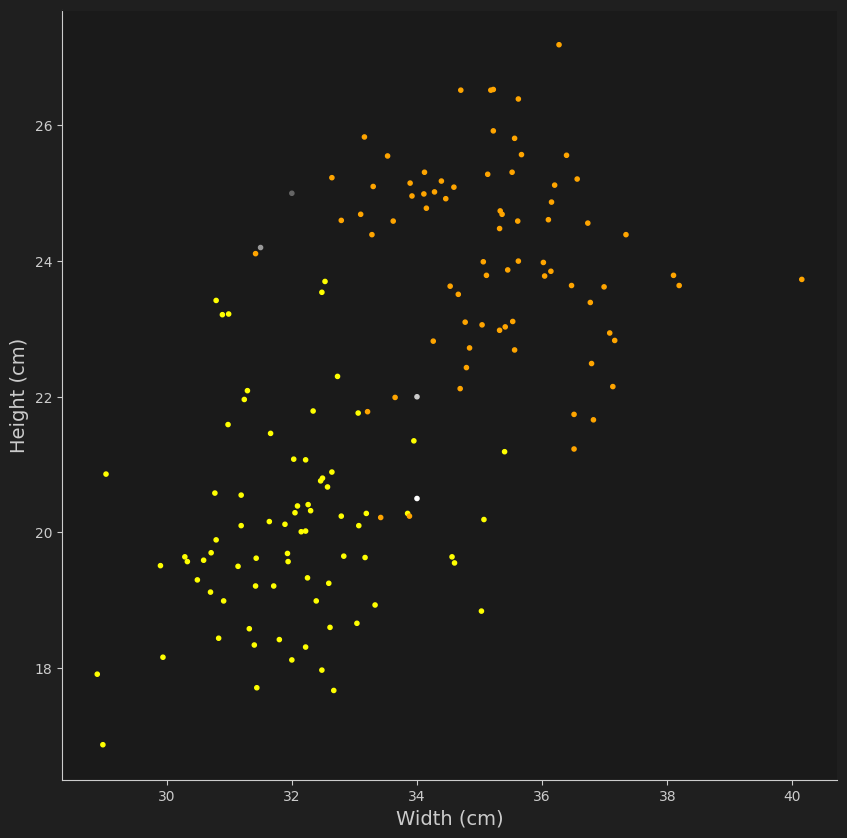

In [199]:
# V2
import matplotlib.pyplot as plt 
import numpy as np
import re


width = list()
height = list()
label = list()
wh = list()

creature = dict()
creature_test = dict()

# Reads the file line by line, and sorts width and height in to a dictionary
# The euclidean distance is calculated and added for each pokemon 
# And last the label is converted in to colors
# Enumerate is used to skip the first Header row in the txt file
with open("datapoints.txt", "r") as file:
    
    for n, e in enumerate(file.readlines()):
        if n == 0:
            continue
        line = e.split(", ")
        width = round(float(line[0]), 2)
        height = round(float(line[1]), 2)
        creature[n-1] = { 
            "width": width, 
            "height": height, 
            "eucli": np.sqrt(width**2 + height**2),
            "label": "orange" if int(line[2][:-1]) else "yellow"
            }


creature_test = dict()
length = len(creature)
with open("testpoints.txt", "r") as file:
    for n, line in enumerate(file.readlines()):
        if n == 0:
            continue
        # Use list comprehension to modify each captured group with round and float before assignment
        weidth, height = [ round(float(e), 2) for e in re.search(r"\((.*), (.*)\)", line).group(1,2) ]
        
        creature_test[n+length-1] = { 
        "width": weidth,
        "height": height,
        "eucli": np.sqrt(height**2 + weidth**2) ,
        "label": (0.2+(n*0.2),0.2+(n*0.2),0.2+(n*0.2))
        }

# Combines the two lists so that all creatures are displayed in the scatter plot
# creature.update( creature_test )



# Create a list with the elements of creature sorted in order of euclidean distance value
# to make the search for nerest neighbour simpler and quicker
creature_order = sorted(creature, key=lambda x: creature[x]["eucli"] )

def label(creature_new):
    past=str()
    for e in creature_new:
        for f in creature_order:
            if creature[f]["eucli"] < creature_new[e]["eucli"]:
                past = f
                continue
            else:
                if creature_new[e]["eucli"]-creature[past]["eucli"] < abs(creature_new[e]["eucli"] - creature[f]["eucli"]):
                    creature_new[e]["label"] == creature[past]["label"]
                else: 
                    creature_new[e]["label"] == creature[f]["label"]
    return creature_new 
creature_test = label(creature_test)

creature.update( creature_test )



def user_input(message:str)->int:
    user_input = input(message) 
    while not user_input.isnumeric() :
        user_input = input(f"Your input is not valid, pleas input a whole positive numeric value\n{message}") 
    return int(user_input)

def evaluator(data):
    return "pickachu" if round(np.sqrt(data[0]**2 + data[1]**2), 2) >= median else "pichu"

#print( f"The pokemon is a { evaluator( (user_input('Input height: '), user_input('Input width:')) ) }" )





fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)


ax.set_facecolor((0.1, 0.1, 0.1))
ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8))
ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8))
ax.yaxis.label.set_color((0.8, 0.8, 0.8))
ax.xaxis.label.set_color((0.8, 0.8, 0.8))
ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
ax.spines['left'].set_color((0.8, 0.8, 0.8))
ax.spines['top'].set_color((0.12, 0.12, 0.12))
ax.spines['right'].set_color((0.12, 0.12, 0.12))
fig.set_facecolor((0.12, 0.12, 0.12))

#plt.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))

plt.scatter([creature[e]["height"] for e in creature], [creature[e]["width"] for e in creature], color=[creature[e]["label"] for e in creature], marker=".", zorder=2)
plt.ylabel("Height (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
plt.xlabel("Width (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
plt.show()